# Visualization with Seaborn





## Introduction

There are a variety of data visualization libraries available in Python. There is a lot of commonality in these libraries, but they do take different approaches and offer somewhat different visualization tools.  

A library called [Matplotlib](https://en.wikipedia.org/wiki/Matplotlib) was developed in 2002. Matplotlib has been designed to work with Numpy and [Scipy](https://en.wikipedia.org/wiki/SciPy). Matplotlib underlies many Python visualization packages, including the one we will learn called [Seaborn](https://seaborn.pydata.org/). Seaborn is an advanced library, it is powerful and straightforward, which makes it a good place to start. However, if you continue to work with these kinds of tools, consider learning Matplotlib as well.

By convention, Seaborn is imported and given the abbreviation `sns`. When you see a call that is prefaced with `sns`, such as `sns.lineplot()`, you are using the Seaborn library.

Here are some image galleries you can take a quick look as so you can get a sense of what these packages can do:
* [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [Matplotlib gallery](https://matplotlib.org/gallery.html)
* [Plotly gallery](https://plotly.com/python/)

We will only be scratching the surface of Seaborn, but once you get used to the basics you should be able to start learning the rest for yourself. 

We will be using calls to Matplotlib to tweak and display the plotting obejct object we have built with Seaborn. In particular we will be using a module within the library called `matplotlib.pyplot`. By convention, `matplotlib.pyplot` is imported as `plot`. When you see a function call prefaced with `plot`, such as `plot.show()`, you are using the Matplotlib library. 


### Preliminaries: Imports and Dataframe Creation
We are going to be using the CORGIS state crime data set. Each row in the dataset represents one year and one U.S. state.

In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ignore this code entirely
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# read the data and create the dataframe
urlg = 'https://raw.githubusercontent.com/'
repo = 'bsheese/CSDS125ExampleData/master/'
fnme1 = 'data_corgis_state_crime.csv'
df_original = pd.read_csv(urlg + repo + fnme1)
df = df_original[df_original['State'] != 'United States']

# read the data and create a supplemental dataframe
fnme2 = 'data_state_info.csv'
df_stateinfo = pd.read_csv(urlg + repo + fnme2)

# remove totals and just keep crime rates
column_mask = ~df.columns.str.contains('Totals')
df = df[df.columns[column_mask]]

#drop rows with empty values
df = df.dropna(axis=0, how='any')

# create a decade column
df.loc[:, 'Decade'] = (df.loc[:, 'Year']//10 * 10).astype(int)

# merge state crime data with supplemental state classification data 
df_stateinfo = df_stateinfo.reset_index()
df = pd.merge(df, df_stateinfo)

# normalize population for better plotting
df.loc[:, 'Population_Mil'] = df.loc[:, 'Population']/1000000 

#check dataframe
df.head(3)

,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,Rates.Violent.Assault,Rates.Violent.Murder,Rates.Violent.Rape,Rates.Violent.Robbery,State,Year,Decade,index,State Code,Region,Division,Population_Mil
0,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5,Alabama,1960,1960,1,AL,South,East South Central,3.26674
1,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1,Alabama,1961,1960,1,AL,South,East South Central,3.30200
2,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5,Alabama,1962,1960,1,AL,South,East South Central,3.35800


In [2]:
# abbreviated decriptives
df.describe().T[['mean', 'min', 'max']].round(1)

,mean,min,max
Population,4751877.0,226167.0,38041430.0
Rates.Property.All,3683.2,573.1,9512.1
Rates.Property.Burglary,929.5,182.6,2906.7
Rates.Property.Larceny,2395.2,293.3,5833.8
Rates.Property.Motor,358.5,48.3,1839.9
Rates.Violent.All,398.9,9.5,2921.8
Rates.Violent.Assault,235.6,3.6,1557.6
Rates.Violent.Murder,6.7,0.2,80.6
Rates.Violent.Rape,28.3,0.8,102.2
Rates.Violent.Robbery,128.2,1.9,1635.1


## Basic Figure Creation with Seaborn

To create a figure or graph we are typically going to:

 * call some specific function within Seaborn, such as `sns.lineplot()`, to create a plotting object
 * include arguments in the call that specify the data to plot and any options that we need
 * write additional code to make tweaks to the object, such as adding a title, legend, or axis labels.
 * call `plt.show()` to display the object

Displaying a plot will typically involve a few lines of code. The initial call will create an object that we can't see yet, but that knows what type of plot it is and what data it holds. We then add to the object and tweak things.  Finally, when we want to see what we've built, we can tell the object to show itself.

This is a slightly different way of interacting with objects than you might be familiar with. It takes some getting used to. The thing to remember is that when you call the initial function you are creating an object. You can then do things with that object, such as put it in a list, assign it to a variable, or display it.

Note: Usually plot objects don't display themselves until you ask, but Colab (and other forms of Jupyter notebooks) try to be helpful and may display your objects even when you haven't asked. You might be tempted to rely on that convenience, but I'd like you not to get into that habit, as it can cause quite a bit of confusion later down the road.


### Seaborn Patterns
Let's look at some code to get a sense of the overall pattern for making plots with Seaborn. Note: Remember that `sns` is the alias for the Seaborn library. 

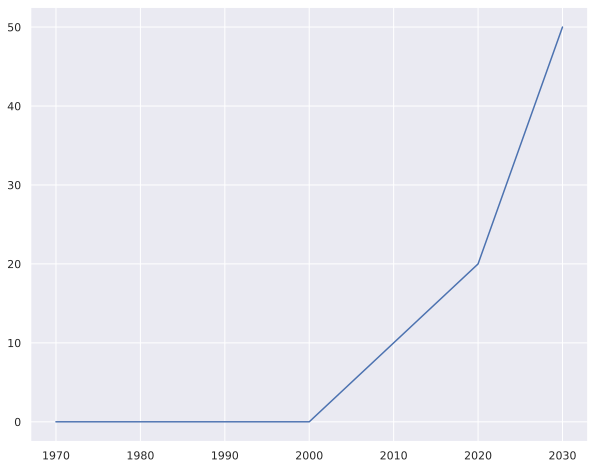

In [3]:
# set figure size
sns.set(rc={'figure.figsize':(10,8)})

# data for our plot
yearlist = [1970, 1980, 1990, 2000, 2010, 2020, 2030]
zombiecount = [0, 0, 0, 0, 10, 20, 50] # slowest zombie spread of all time

# plot starts here
sns.lineplot(x = yearlist, y = zombiecount) # called a line plot, lists as x and y
plt.show() # displays the plot

Let's add a few more components to our figure.

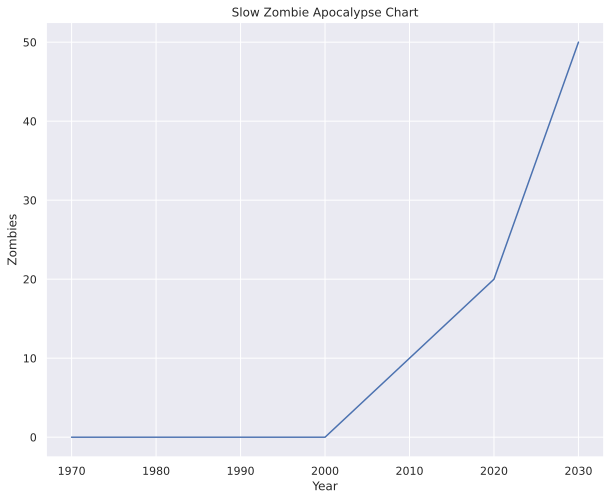

In [4]:
# data for our plot
yearlist = [1970, 1980, 1990, 2000, 2010, 2020, 2030]
zombiecount = [0, 0, 0, 0, 10, 20, 50] # slowest zombie spread of all time

# plot starts here
sns.lineplot(x = yearlist, y = zombiecount) # called a line plot, lists as x and y
plt.title('Slow Zombie Apocalypse Chart') # added a title
plt.xlabel('Year') # added a x-axis label
plt.ylabel('Zombies') # added a y-axis label
plt.show() # displays the plot

Here we will plot two sets of data on the same figure. Notice we are calling `sns.lineplot()` twice, but we are not getting back two plots. Instead, the second call adds to the existing object. 

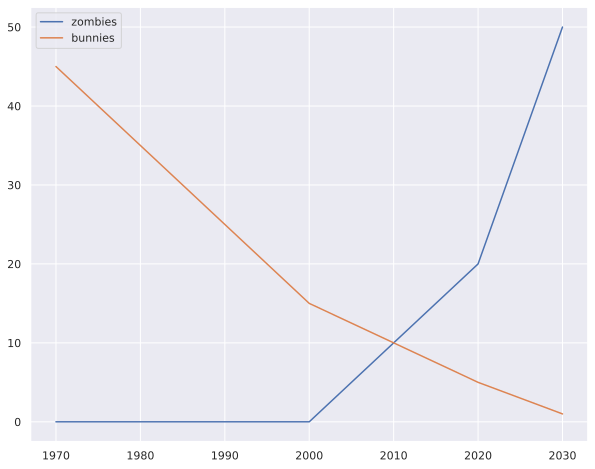

In [5]:
# data for our plot
yearlist = [1970, 1980, 1990, 2000, 2010, 2020, 2030]
zombiecount = [0, 0, 0, 0, 10, 20, 50] # slowest zombie spread of all time
bunnycount = [45, 35, 25, 15, 10, 5, 1] # bunnies have a rough time

# plot starts here
sns.lineplot(x = yearlist,
             y = zombiecount,
             label = 'zombies') # called a line plot, lists as x and y
sns.lineplot(x = yearlist,
             y = bunnycount,
             label = 'bunnies') # add a line to the existing plot
plt.show() # displays the plot

Again, here is the general pattern:

1.   Have the data in some form
2.   Call a Seaborn function to plot the data, supply necessary arguments
3.   Tweak or add to the plot with calls to `plt` (which is an alias for another library called matplotlib)
4.   Display the result

Make sure you can recognize how the code above accomplishes each step.


### Seaborn Patterns with Pandas
If you have your data in a dataframe, you can hand specific series from your dataframe to Seaborn for plotting. 

For example:

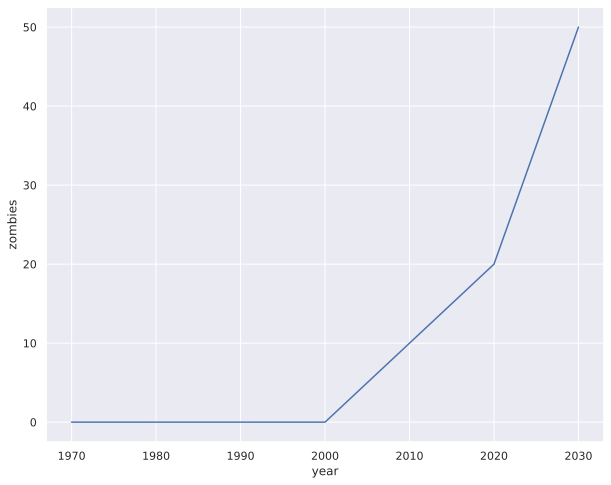

In [6]:
# create a zombie bunny dataframe
# don't worry about how this works
dfzb = pd.DataFrame(zip(yearlist, zombiecount, bunnycount))
dfzb.columns = ['year', 'zombies', 'bunnies']

# plot the data
sns.lineplot(x = 'year', y = 'zombies', data = dfzb) # specifies series and dataframe
plt.show()

Notice that Seaborn has taken the series names and used them as axis-labels. We can override this with a subsequent call to `plt`.

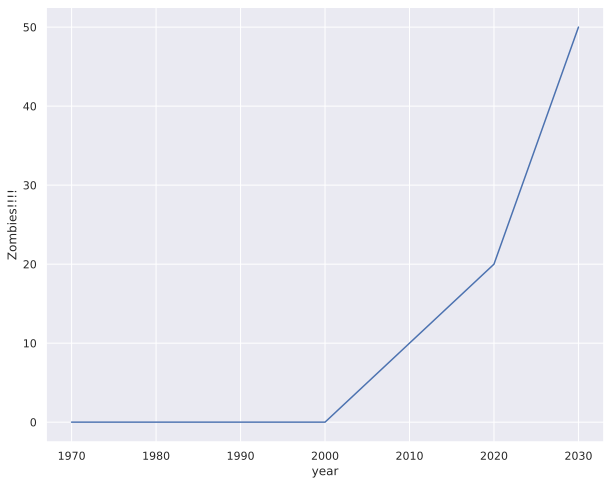

In [7]:
sns.lineplot(x = 'year', y = 'zombies', data = dfzb) # specify series and dataframe
plt.ylabel('Zombies!!!!')
plt.show()

We have options for supplying our data to Seaborn. We can feed it the data directly, for example, by passing it a series, or we use `data = ` to specify a dataframe and then it will look for x and y in the column names. Students commonly blend the two approaches and have difficulty figuring out why it fails. Always check that you've specified a data source, if you are trying to plot a series from a dataframe.

## Line Plots
Up until now we have been making lineplots where there was only one y value for each x value in the line. For example, in 2030 there was one 1 bunny left. However, often when we make a lineplot the line is acutally representing a summary of lots of data points. For example, lets say we were plotting weekly Broadway revenue. A line plot would then procude a single point for each week representing the average revenue of lots of Broadway productions. In a sense, Seaborn is acting alot like `pd.groupby()` and it is automatically aggregating over groups of data to produce the plots. If we hand Seaborn data where there are many values for each point we want to plot, and ask it to make a line plot, it will assume we want the mean plotted, and automatically handle aggregating, calculating the mean, and then plotting the line. 

In addition, Seaborn will add a band of color around the line. Let's see what that looks like:

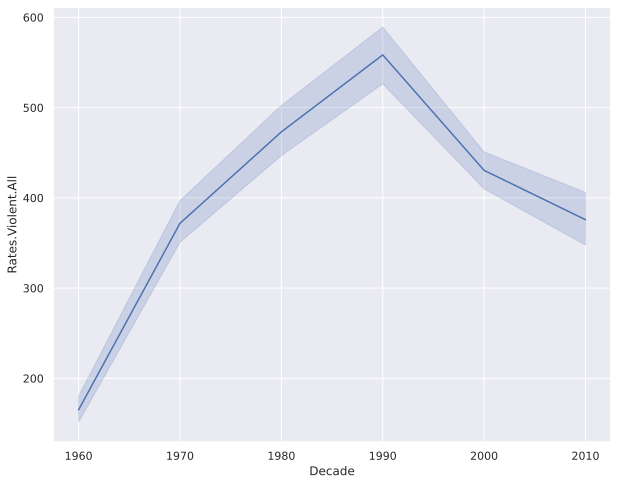

In [8]:
sns.lineplot(x = "Decade",
             y = "Rates.Violent.All",
             data = df)
plt.show() # still need this to show the plot

In this dataset we have data from different states for each decade. 
Seaborn represents the mean value with the darker blue line. The lighter blue line represents you a statistic called the 95% confidence interval. The confidence interval depends on both the sample size and the variance of the data itself. We will talk more about this later. If you are interested, [read more about confidence intervals here](https://en.wikipedia.org/wiki/Confidence_interval).

We can add a second line to plot by by adding a second function call to our code. 

Notice that the data in the plot above is the same as the data in the lower line in the plot below. If I showed you the one above and asked you come to a conclusion about violent crime rates you would likely come to a different conclusion that if I showed you the one below. The only difference between the two is the scaling of the y-axis. Property crime is much more common, so Seaborn changed the y-axis to accommodate the second set of data.

Also notice that the confidence intervals are still there but may be difficult to see due to the scaling and the size of the figure display.

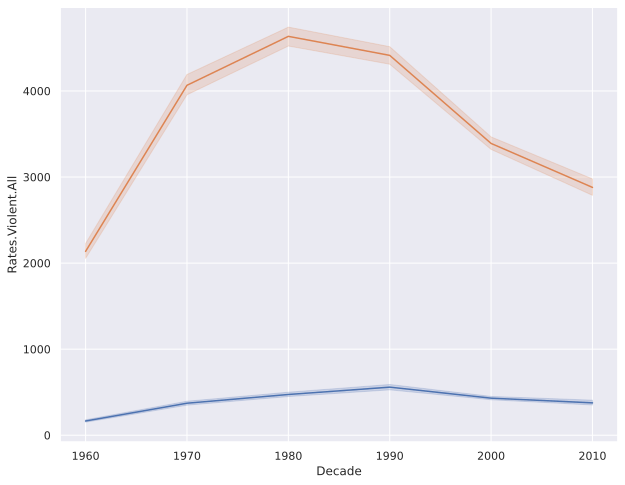

In [9]:
sns.lineplot(x = "Decade", y = "Rates.Violent.All", data = df)
sns.lineplot(x = "Decade", y = "Rates.Property.All", data = df)
plt.show()

## Categorical Plots


### Bar Charts
We can used `sns.barplot()` to create bar charts. 

By default Seaborn represents the mean of the data as the height of the bar and represents the dispersion of the data with a small grey line that crosses though the top of the bar. The top and bottom of that line represent the 95% confidence interval. 

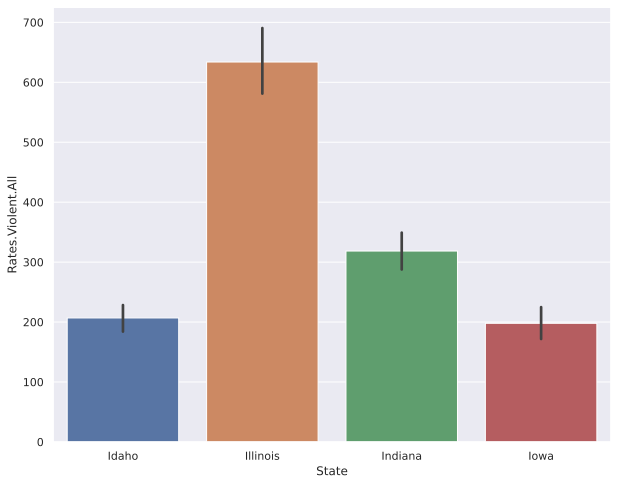

In [10]:
# create a view into the dataframe restricted to States that start with 'I'
dfi = df.loc[df.loc[:, 'State'].str.startswith('I')]

sns.barplot(x = "State",
            y = "Rates.Violent.All",
            data = dfi)
plt.show()

To get a horizontal bar chart we just flip the variable assigned to the axes.

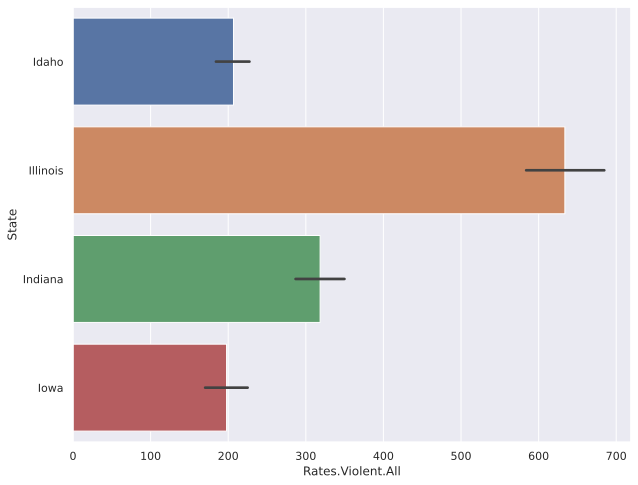

In [11]:
sns.barplot(y = "State",
            x = "Rates.Violent.All",
            data = dfi)
plt.show()

### Grouped Bar Charts
By adding the `hue` arguments we can create grouped bar charts. 

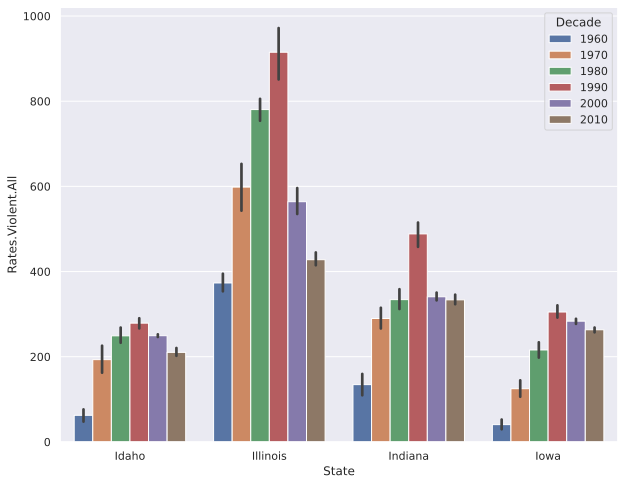

In [12]:
dfi = df.loc[df.loc[:, 'State'].str.startswith('I')]

sns.barplot(x = "State",
            y = "Rates.Violent.All",
            hue= 'Decade',
            data = dfi)
plt.show()

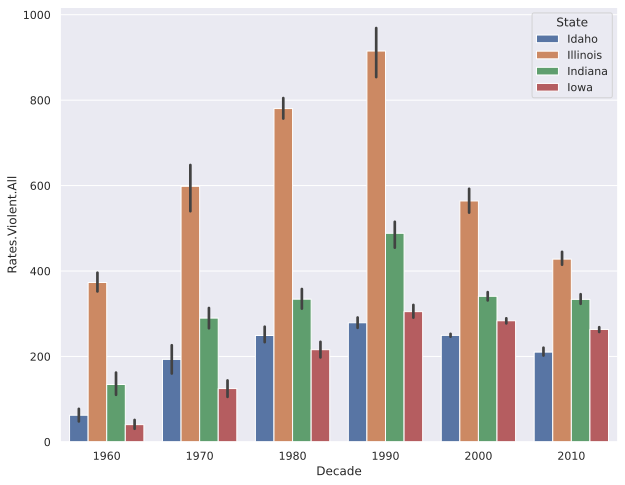

In [13]:
dfi = df.loc[df.loc[:, 'State'].str.startswith('I')]

sns.barplot(x = "Decade",
            y = "Rates.Violent.All",
            hue= 'State',
            data = dfi)
plt.show()

### Count Plots
We can make plots of the frequency of categorical data using `sns.countplot()`.

Note that we are only supplying an argument for the category we wanted counted. Seaborn handles actually doing the count. 

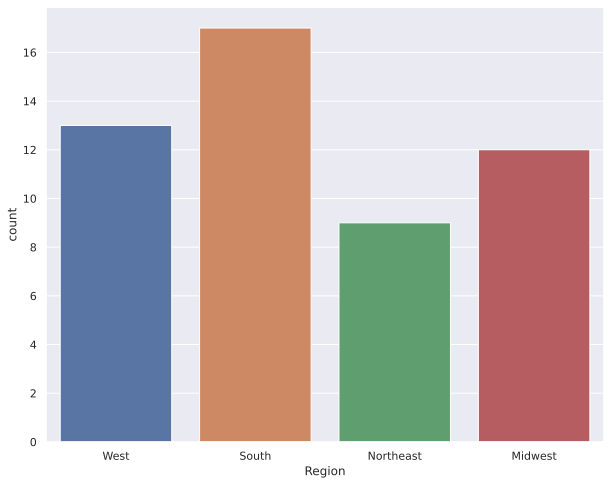

In [14]:
# countplot
sns.countplot(x = "Region",
              data = df_stateinfo)
plt.show()

We can make a horizontal version of the frequency count by specifying the categorical data using the argument `y` rather than `x`.

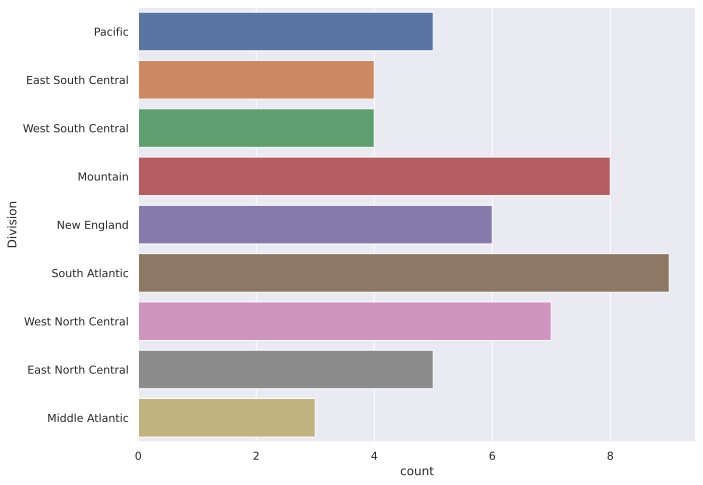

In [15]:
# horizontal countplot
sns.countplot(y = "Division",
              data = df_stateinfo)
plt.show()

## Histograms
You can use Seaborn's `.histplot()` method to create a histogram, which provides frequency counts for continuous data. This method uses the argument `bins=` to specify the number of bins in the histogram. 

Note: In the plot below, the y-axis represents the count of values falling within each bin.

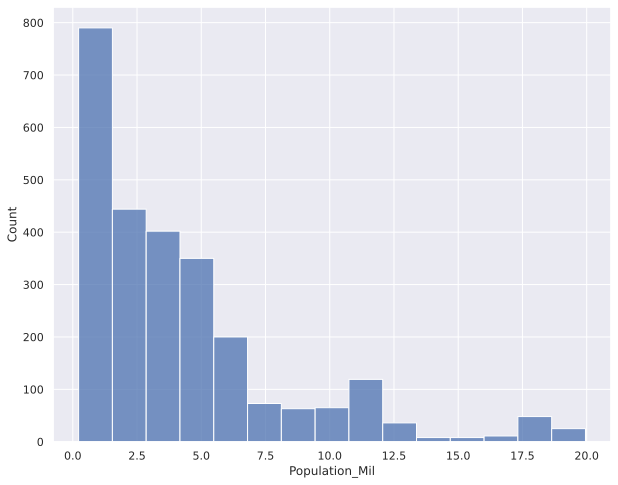

In [16]:
# view of states with lower population
df_small = df.loc[df.loc[:, 'Population_Mil'] < 20]

# create histogram
sns.histplot(x = 'Population_Mil',
             data = df_small, 
             bins = 15)
plt.show()

Two overlapping distributions to compare frequencies.

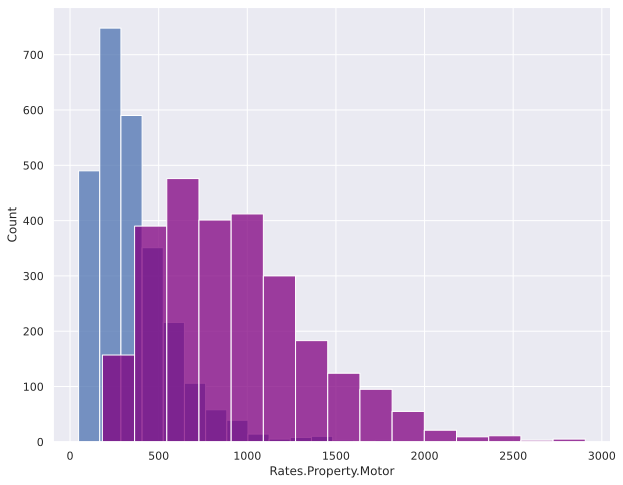

In [17]:
# create overlapping histogram with two calls
sns.histplot(x = 'Rates.Property.Motor',
             data = df_small, 
             bins = 15)
sns.histplot(x = 'Rates.Property.Burglary',
             data = df_small, 
             bins = 15,
             color = 'purple')
plt.show()

## Box Plots
Another way of showing both central tendency and dispersion is the boxplot. In Seaborn, we can create boxplots by using the `kind='box'` argument. 

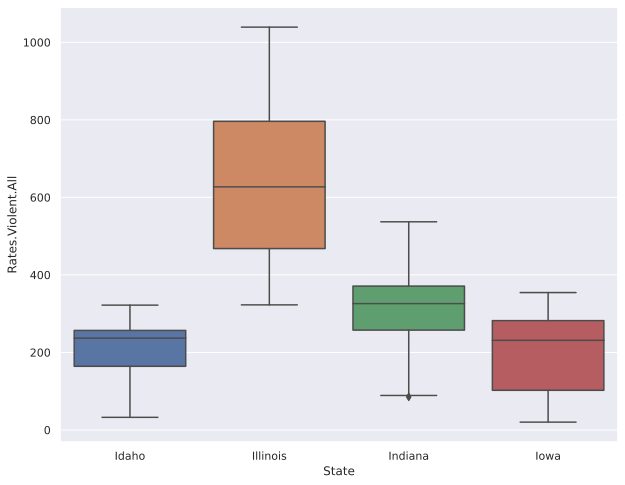

In [18]:
# create boxplot
sns.boxplot(x = "State",
            y = "Rates.Violent.All",
            data = dfi)
plt.show()

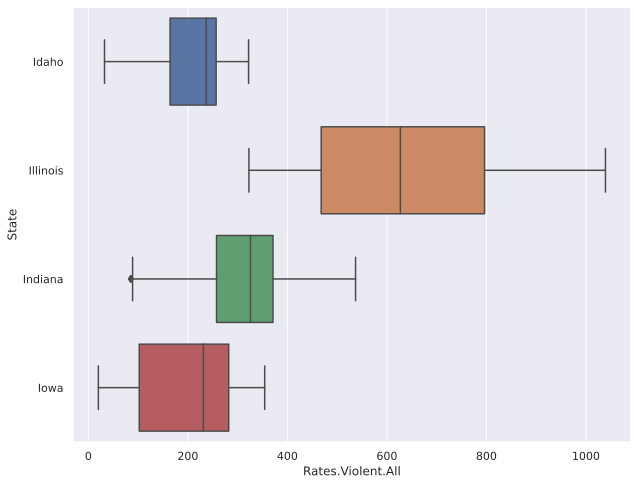

In [19]:
# create horizontal boxplot
sns.boxplot(y = "State",
            x = "Rates.Violent.All",
            data=dfi)
plt.show()

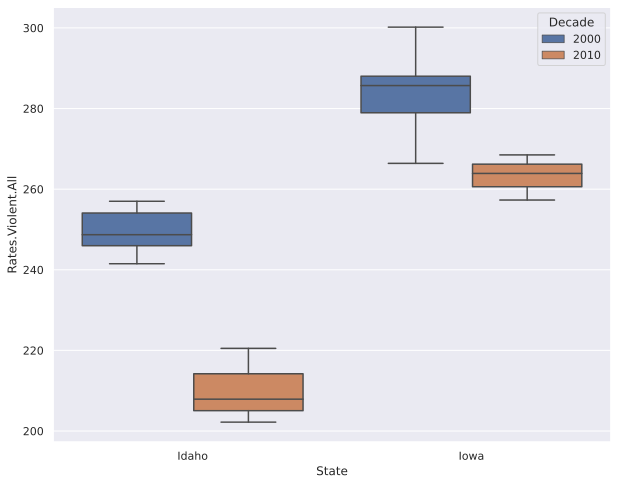

In [20]:
# create masks
smalli_mask = dfi.loc[:, 'State'].isin(['Idaho', 'Iowa'])
recent_mask = dfi.loc[:, 'Decade'] > 1990

# create boxplots
sns.boxplot(x = "State",
            y = "Rates.Violent.All",
            hue = 'Decade',
            data = dfi.loc[smalli_mask & recent_mask])
plt.show()

## Scatter Plots
Seaborn's `.scatterplot()` method can be used to make scatterplots of data. 

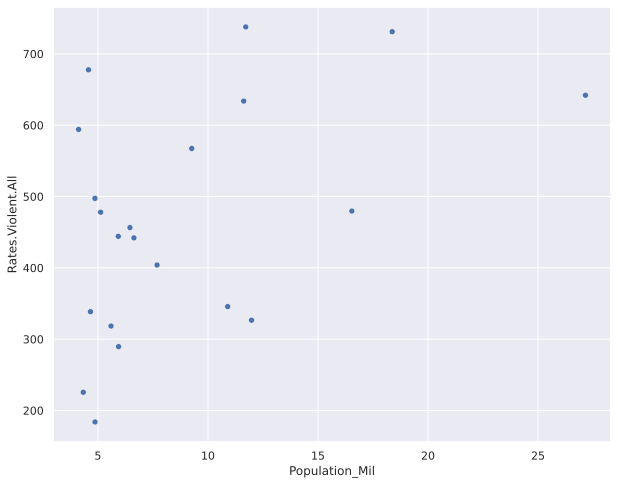

In [21]:
# group by state, with mean aggregation
df_grouped_state_mean = df.groupby(by='State').mean()

# create list of largest population states
big_states = df_grouped_state_mean \
             .loc[:, 'Population'] \
             .sort_values()[-21:] \
             .index.to_list()

# use big state list to index df_grouped
dfbig = df_grouped_state_mean \
        .loc[df_grouped_state_mean.index.isin(big_states)]

# create scatterplot
sns.scatterplot(x = "Population_Mil",
                y = "Rates.Violent.All",
                data = dfbig)
plt.show()


Among the twenty largest states, there does not appear to be a simple linear association between population and rates of violent crime. It would be nice to know what state each point represents. Let's try adding the hue arguement to see how that goes. 

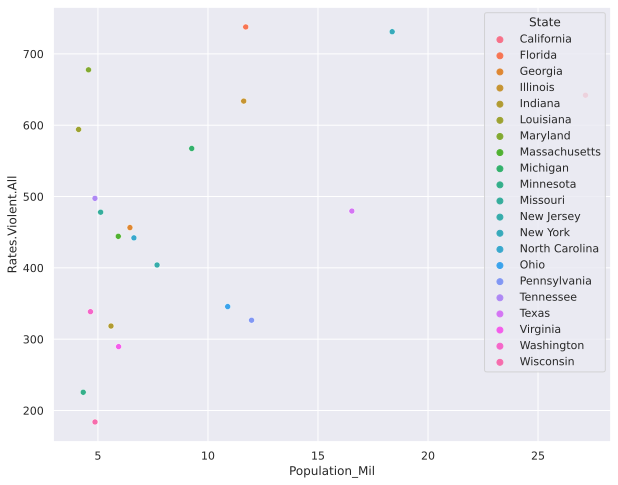

In [22]:
# create scatterplot with labelled data points
sns.scatterplot(x = 'Population_Mil',
                y = 'Rates.Violent.All',
                hue = dfbig.index,
                data = dfbig)
plt.show()

That's an all new kind of terrible chart that we've made. The States appear in the legend in alphabetical order, but there's so many it's impossible to tell one shade of State from another. Let's try it again with a smaller selection of states.

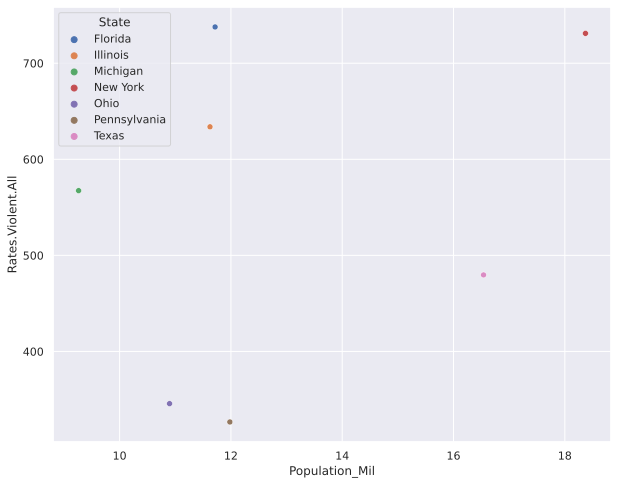

In [23]:
# create list of largest population states
big_six = df_grouped_state_mean  \
          .loc[:, 'Population'] \
          .sort_values()[-8:-1] \
          .index \
          .to_list()

# use big state list to index df_grouped
dfbig6 = df_grouped_state_mean \
         .loc[df_grouped_state_mean.index.isin(big_six)]

# create plot
sns.scatterplot(x = 'Population_Mil',
                y = 'Rates.Violent.All',
                hue = dfbig6.index,
                data = dfbig6)
plt.show()

An improvement, but still ugly. We can use a matplotlib method to control where the legend is displayed.

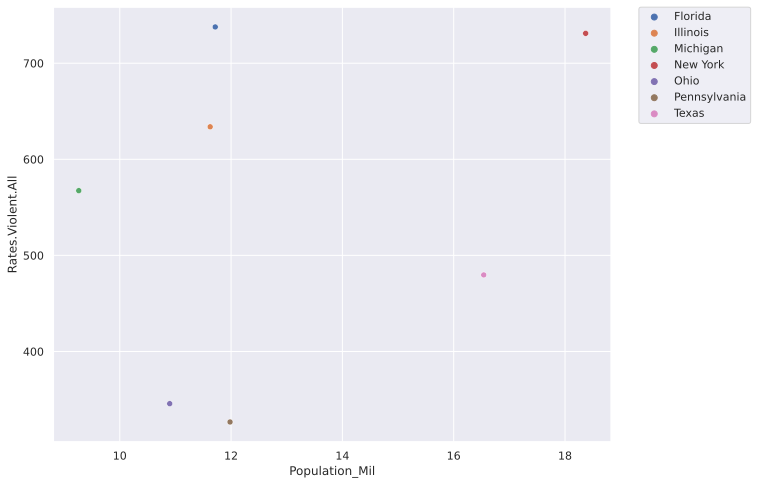

In [24]:
# create plot
sns.scatterplot(x = 'Population_Mil',
                y = 'Rates.Violent.All',
                hue = dfbig6.index,
                data = dfbig6)

# use a matplotlib method to control the legend display
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

That's a bit better. Now that the plot is cleaned up, let's look at what it says about our States. 

Unfortunately, Florida shows that smaller populations (relative to NY and TX) can have violent crime rates that match or exceed bigger states. 

We can examine the same assocation by region. 

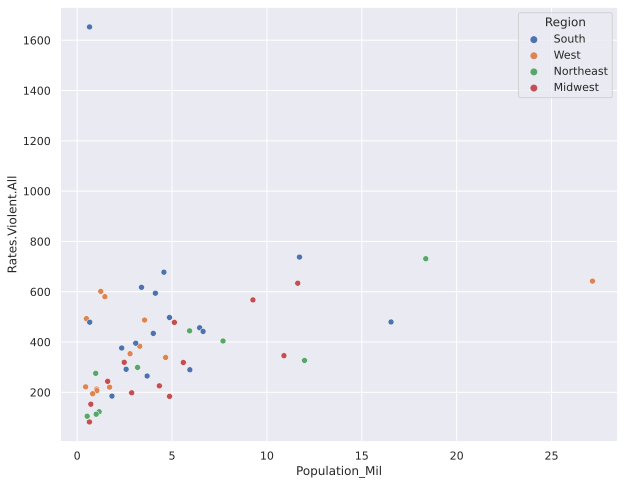

In [25]:
# add the state supplemental information into the grouped state mean df
df_grouped_state_mean = pd.merge(df_grouped_state_mean.reset_index(),
                                 df_stateinfo)

# plot the association with Region specified as the hue
sns.scatterplot(x = 'Population_Mil',
                y = 'Rates.Violent.All',
                hue = 'Region',
                data = df_grouped_state_mean)
plt.show()

That's not a particularly good visualization. Too many brightly colored dots  all next to one another. 

Let's try breaking up the plots by region. 

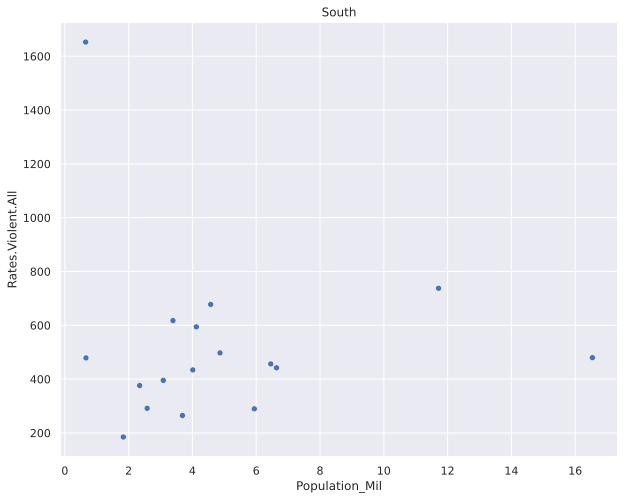

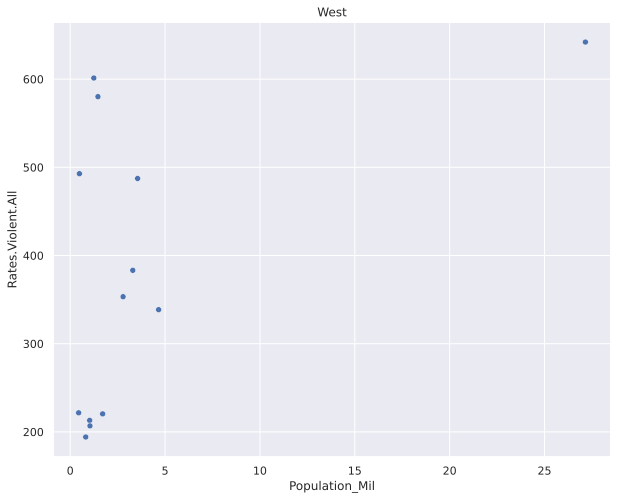

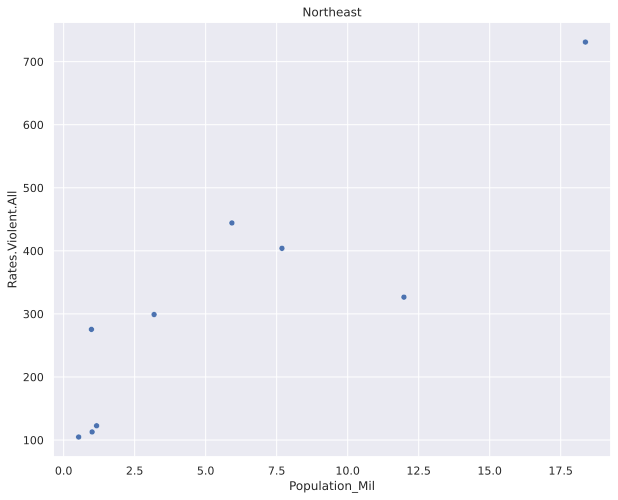

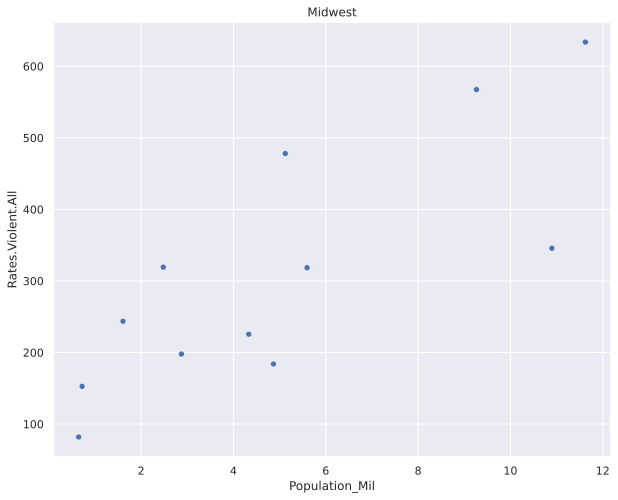

In [26]:
for region in df_grouped_state_mean.loc[:, 'Region'].unique():
  sns.scatterplot(x = 'Population_Mil',
                  y = 'Rates.Violent.All',
                  data = df_grouped_state_mean \
                  .loc[df_grouped_state_mean['Region'] == region])
  plt.title(region)
  plt.show()

So there does appear to be a positive association between population size and rates of violence in the Northeast and Midwest. 

The plots for the South and the West both have outliers (data points that appear to be quite distant from the others). In the South, we have a relatively small state with a very high rate of violent crime. (It's not actually a state, despite having a population larger than several states, but we will come back to that). In the West, we have a very large state (California), with a rate of crime very similar to much less populus states.  

### Scatter Plots with Regression Lines
Regression is a technique for fitting a model to your data that can help you better understand how to variables in your data are related. It can also be used to make predictions. Think of it as moving one step beyond just looking at correlations.  

'Simple linear regression' is used to fit a straight line through the data. You use this technique when you think two variables have a simple linear (not curved) relation with one another.   

Seaborn includes visualizations of regression lines. Typically these show a basic scatter plot with the regression line added. Seaborn's regression visualization also includes a band around the line indicating the confidence interval. 

Note: If you are looking for formal regression statistics for your model, you should be aware that Seaborn's documentation states that their regression functionality is only intended to help with visualization and that formal regression statistics should be created with a different package, such as [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). 

Let's use regression visualizations to look at the following question:
In large population states, is higher property crime associated with higher violent crime rates?

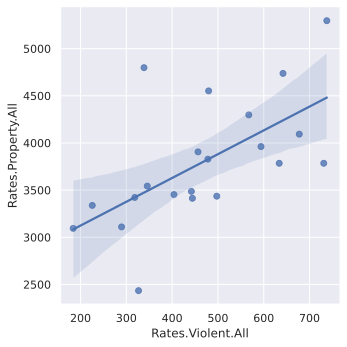

In [27]:
# scatter plot with regression line
sns.lmplot(x = 'Rates.Violent.All',
           y = 'Rates.Property.All',
           data = dfbig)
plt.show()

How about overall?

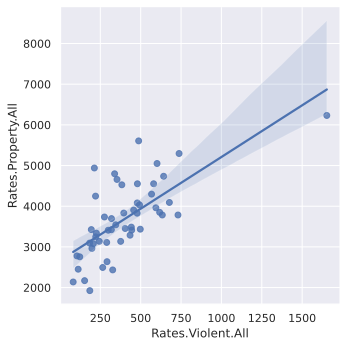

In [28]:
# scatterplot wtih regression line
sns.lmplot(x = 'Rates.Violent.All',
           y = 'Rates.Property.All',
           data = df_grouped_state_mean)
plt.show()

What about the ten states with the highest levels of violence?

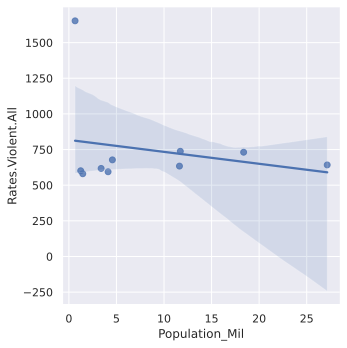

In [29]:
# create list of highest violence states by sorting, then indexing the list,
# and then grabbing the state names from the index
highest_violence = df_grouped_state_mean \
                   .loc[:, 'Rates.Violent.All'] \
                   .sort_values() \
                   .index \
                   .to_list()[-10:]

# use high violence list to index df_grouped using .isin()
dfhighv = df_grouped_state_mean \
          .loc[df_grouped_state_mean \
               .index \
               .isin(highest_violence)]

# plot
sns.lmplot(x = "Population_Mil",
           y = "Rates.Violent.All",
           data = dfhighv)
plt.show()

These visualizations show a single outlier (notice that datapoint in the top left of the graph) that needs to be explored. We will come back to that soon. 

Let's look at the assocation between property crime and population by region.
Some Seaborn plotting functions, but not all, take an argument, `col =`, that allows us to create groups of plots. Earlier we did this with a loop. Using `col` and `col_wrap=`, which specifies how many plots you want per row, makes things a bit easier for us than writing a loop.  

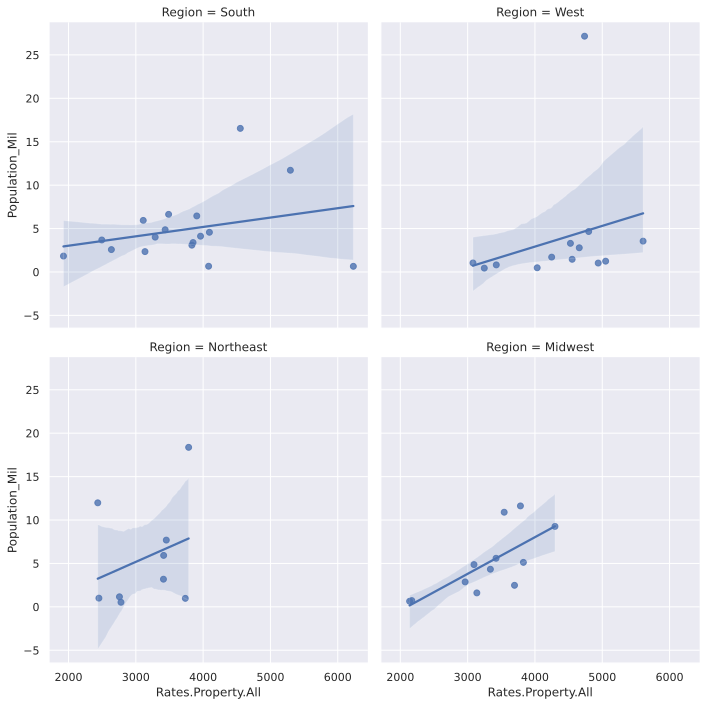

In [30]:
# scatter plots with regression lines in colums and rows
sns.lmplot(y = 'Population_Mil',
           x = 'Rates.Property.All',
           col = 'Region', # creates a seperate plot for each region
           col_wrap = 2,  # wraps columns so not all side by side
           data=df_grouped_state_mean)
plt.show()

The columns and rows of plots look nice, but the plots themselves are a bit ugly. Here, the scaling is consistent across the subplots, but most regions don't have data points across the full range of values so the result is short, stunted looking, regression lines. Although we will lose the advantage of having common scaling between graphs, we can go back to our loop to make individual plots so Seaborn will scale each plot individually:

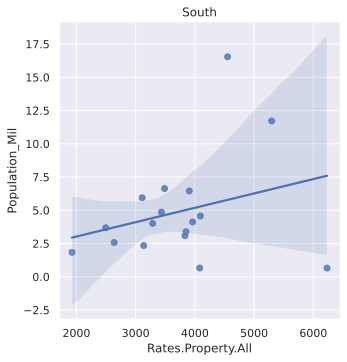

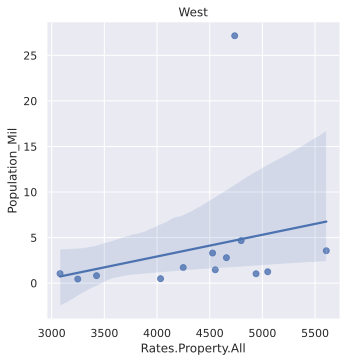

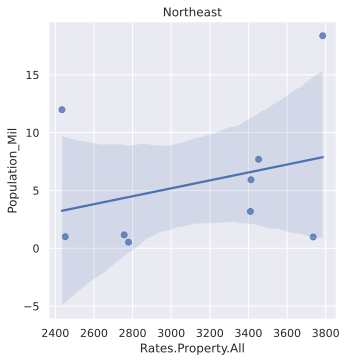

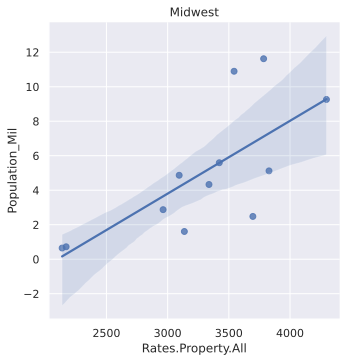

In [31]:
# scatter plots with loop
for region in df['Region'].unique(): # loop through the regions
  # create a subset of the data with just one region at a time
  regiondata = df_grouped_state_mean \
               .loc[df_grouped_state_mean['Region'] == region]
  
  # make the plot
  sns.lmplot(y = 'Population_Mil',
             x = 'Rates.Property.All',
             data = regiondata)
  plt.title(region)
  plt.show()

That's a bit better. Now let's clean it up and provide labels and such.

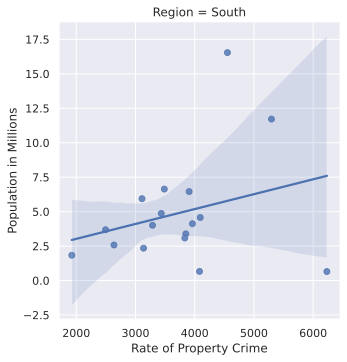

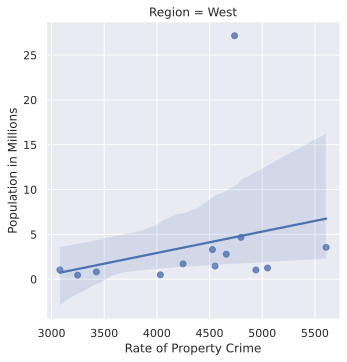

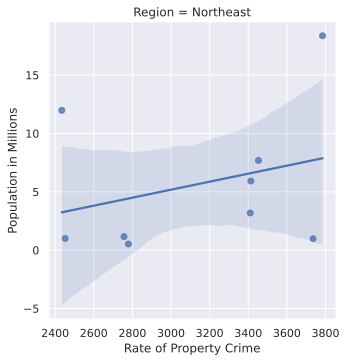

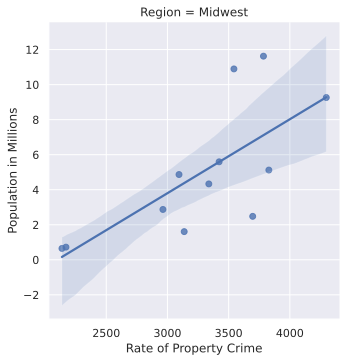

In [32]:
# same as above, but with title and labels
for region in df['Region'].unique():
  regiondata = df_grouped_state_mean \
              .loc[df_grouped_state_mean['Region'] == region]
  sns.lmplot(y = 'Population_Mil',
             x = 'Rates.Property.All',
             data = regiondata)
  plt.ylabel('Population in Millions')
  plt.xlabel('Rate of Property Crime')
  plt.title(f'Region = {region}')
  plt.show()


This second approach makes for better individual charts to look at the regression lines, but the difference in scaling between them might create problems for folks who don't pay close attention to these things (which is most of us, most of the time). So there is a trade-off for plotting things this way. Be careful with these sorts of scaling issues and consider your audience when making your visualizations.

***

We will explore the state crime data a bit more in an upcoming exercise. If you are interested in more recent data about overall trends in the U.S. take a look at [this analysis by the Pew Research Center](https://www.pewresearch.org/fact-tank/2020/11/20/facts-about-crime-in-the-u-s/).



